In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as keras
import numpy as np
from sklearn.datasets import fetch_openml
from scipy.ndimage.interpolation import shift
##import data: 
## mount your google drive: 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [36]:
# Get the data and target
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]


Creating Augmented Dataset...
Creating Augmented Dataset completed
Training on the existing dataset
Training on augmented dataset
Accuracy score after training on existing dataset 0.9688
Accuracy score after training on augmented dataset 0.9754
Training on the existing dataset
Training on augmented dataset
Accuracy score after training on existing dataset 0.9705
Accuracy score after training on augmented dataset 0.98


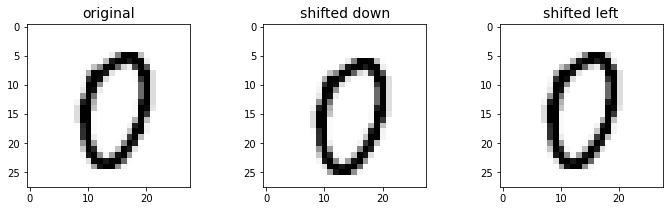

In [37]:

# Split the train and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#X_train, X_test, y_train, y_test = train_images[:60000], test_images[60000:], train_labels[:60000], test_labels[60000:]
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 1)
shifted_image_left = shift_image(image, -1, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(132)
plt.title("shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(133)
plt.title("shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")

# Uncomment the follwoing to see the example of shift
#plt.show()

print("Creating Augmented Dataset...")
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for image, label in zip(X_train, y_train):
             X_train_augmented.append(shift_image(image, dx, dy))
             y_train_augmented.append(label)


shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

print("Creating Augmented Dataset completed")

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
print("Training on the existing dataset")
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print("Training on augmented dataset")
knn_clf.fit(X_train_augmented, y_train_augmented)
y_pred_after_augmented = knn_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy score after training on existing dataset", accuracy_score(y_test, y_pred))
print("Accuracy score after training on augmented dataset", accuracy_score(y_test, y_pred_after_augmented ))


from sklearn.ensemble import RandomForestClassifier
print("Training on the existing dataset")
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)


print("Training on augmented dataset")
rf_clf_for_augmented = RandomForestClassifier(random_state=42)
rf_clf_for_augmented.fit(X_train_augmented, y_train_augmented)
y_pred_after_augmented = rf_clf_for_augmented.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy score after training on existing dataset", accuracy_score(y_test, y_pred))
print("Accuracy score after training on augmented dataset", accuracy_score(y_test, y_pred_after_augmented ))

In [38]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [39]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [40]:
train_images = X_train.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = X_test.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [41]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
train_labels.shape

(60000, 10)

In [42]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.4311 - accuracy: 0.8747
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1094 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0703 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0485 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0370 - accuracy: 0.9888


In [43]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9786
0.978600025177002


In [44]:
train_images = X_train_augmented.reshape((300000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [45]:
train_labels = to_categorical(y_train_augmented)
train_labels.shape

(300000, 10)

In [46]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
2344/2344 [==============================] - 21s 9ms/step - loss: 0.0625 - accuracy: 0.9808
Epoch 2/5
2344/2344 [==============================] - 21s 9ms/step - loss: 0.0392 - accuracy: 0.9883
Epoch 3/5
2344/2344 [==============================] - 21s 9ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 4/5
2344/2344 [==============================] - 21s 9ms/step - loss: 0.0228 - accuracy: 0.9931
Epoch 5/5
2344/2344 [==============================] - 21s 9ms/step - loss: 0.0188 - accuracy: 0.9944


In [47]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0539 - accuracy: 0.9849
0.9848999977111816
